## Nataf - Example 1

Author: Dimitris Giovanis

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Nataf
from UQpy.Distributions import Distribution
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from UQpy.Distributions import Gamma, Lognormal
dist1 = Gamma(4.0, loc=0.0, scale=1.0)
dist2 = Lognormal(s=2., loc=0., scale=np.exp(1))

Rho = np.array([[1.0, 0.9], [0.9, 1.0]])

In [3]:
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
nataf_obj = Nataf(dist_object=[dist1,dist2], corr_x=Rho)
print(nataf_obj.H)

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.8251974088995553]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.7935133581275383]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.7773877316759048]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.7692537377254112]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.7651689109108426]
UQpy: ITAM Done.
[[1.       0.996875]
 [0.996875 1.      ]]


In [4]:
corr_x = Nataf.distortion_z2x(dist_object=[dist1,dist2], corr_z=nataf_obj.corr_z)
print(corr_x)

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
[[1.         0.36039123]
 [0.36039123 1.        ]]


(1000, 2)


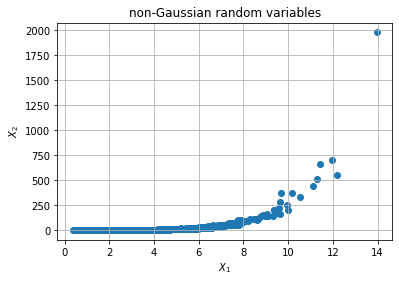

In [5]:
samples_x = nataf_obj.rvs(1000)
plt.figure()
plt.title('non-Gaussian random variables')
plt.scatter(samples_x[:, 0], samples_x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

[[0.32287165 0.        ]
 [0.00492175 0.00039001]]


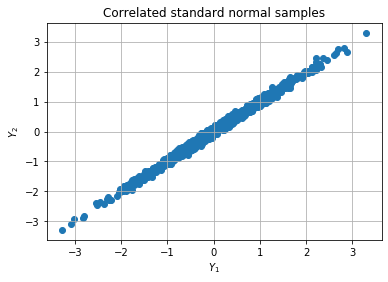

In [6]:
samples_z, jacobian_x2z = nataf_obj.transform_x2z(samples_x, jacobian=True)
print(jacobian_x2z[0])

plt.figure()
plt.title('Correlated standard normal samples')
plt.scatter(samples_z[:, 0], samples_z[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

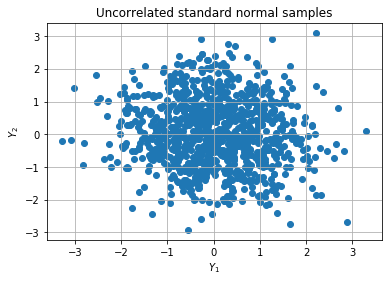

In [7]:
from UQpy.Transformations import Decorrelate

samples_y = Decorrelate(samples_z, nataf_obj.corr_z).samples_y

plt.figure()
plt.title('Uncorrelated standard normal samples')
plt.scatter(samples_y[:, 0], samples_y[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

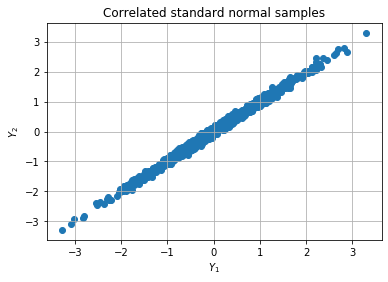

In [8]:
from UQpy.Transformations import Correlate

samples_z = Correlate(samples_y, nataf_obj.corr_z).samples_z

plt.figure()
plt.title('Correlated standard normal samples')
plt.scatter(samples_z[:, 0], samples_z[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

In [ ]:
w3 = np.zeros(10)
rho = np.linspace(-0.999, 0.999, 10)
for i in range(10):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf.distortion_x2z([dist1,dist2], Rho1)
    w3[i] = ww[0, 1]
    print(i)

plt.plot(w3, rho)
plt.plot(rho, rho)
plt.show()

In [ ]:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

N = 20
w4 = np.zeros(N)
rho = np.linspace(-0.999, 0.999, N)
for i in range(N):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Inverse.distortion_z_to_x(dist_object=[dist1,dist2], cov=Rho1)
    w4[i] = ww[0, 1]

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()

In [ ]:
from UQpy.Distributions import Gamma, Lognormal
dist1 = Gamma(4.0, loc=0.0, scale=1.0)
dist2 = Lognormal(s=2., loc=0., scale=np.exp(1))

nataf_obj = Nataf(dist_object=[dist1,dist2])

samples_x = nataf_obj.rvs(1000)
plt.figure()
plt.title('Random samples')
plt.scatter(samples_x[:, 0], samples_x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [ ]:

samples_z = nataf_obj.transform_x2z(x.samples)
plt.figure()
plt.title('Random samples')
plt.scatter(samples_z[:, 0], samples_z[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [9]:
from UQpy.Distributions import Normal, Uniform
Rx = np.array([[1.0, 0.8], [0.8, 1.0]])
dist1 = Normal(loc=2., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

nataf_obj = Nataf(dist_object=[dist1,dist2], corr_x=Rx)
print(nataf_obj.corr_z)

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.0257895715903001]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 9.42055475210265e-16]
UQpy: ITAM Done.
[[1.         0.81866137]
 [0.81866137 1.        ]]


In [15]:
dist1 = Normal(loc=0., scale=1.)
dist2 = Normal(loc=0., scale=1.)
#Rx = np.eye(2)
Rx = np.array([[1.0, 0.8], [0.8, 1.0]])
nataf_obj = Nataf(dist_object=[dist1,dist2], corr_x=Rx)
print(nataf_obj.H)

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 2.3912508145753893e-13]
UQpy: ITAM Done.
[[1.  0. ]
 [0.8 0.6]]
